# Exploratory Data Analysis (EDA)

## Purpose of this Notebook

This notebook focuses on **understanding the dataset** before building any machine learning models.

The goal is to answer:

> **What patterns exist in customer behavior that may explain churn?**

We analyze distributions, relationships, and data quality to:

* Understand how customers differ
* Identify potential churn signals
* Detect data issues
* Inform preprocessing and modeling decisions

No predictive modeling is performed here — only investigation and insight generation.

Model development will occur in a separate **modeling notebook**, where we answer whether churn can be predicted reliably.


In [1]:
# Import Required Libraries

# pandas & numpy → data manipulation
# matplotlib & seaborn → visualization
# %matplotlib inline → ensures plots render in notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Data Loading & Initial Exploration

We begin by loading the Telco Customer Churn dataset and inspecting its structure to understand:
- The number of observations and features
- Data types
- Potential data quality issues
- Class distribution of the target variable (`Churn`)


In [2]:
# Load Telco Customer Churn Dataset

# Dataset: IBM Telco Customer Churn
# Source: Downloaded from Kaggle and stored locally in data/raw directory
# Objective: Explore customer attributes associated with churn behavior

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Dataset Dimensions
# Understanding number of rows (customers) and columns (features)

df.shape

(7043, 21)

### Dataset Size

The dataset contains 7,043 customer records and 21 features.

This provides sufficient data volume for both exploratory analysis and predictive modeling.

In [4]:
# Data Structure & Type Inspection

# This helps identify:
# - Data types (categorical vs numerical)
# - Potential type mismatches
# - Missing values

df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Structure Observations

- Most features are categorical (stored as object/string).
- `tenure` and `MonthlyCharges` are numerical.
- `TotalCharges` is currently stored as a string and will require conversion to numeric data type.
- No immediate null values are visible in the non-null count summary.

Next step will include verifying numeric consistency and potential hidden missing values.


In [5]:
# Data Cleaning: Convert 'TotalCharges' to Numeric, and deleteing the customerID column.

# Observation:
# 'TotalCharges' is stored as an object (string), but it should be numeric.

# Possible issue:
# Some rows may contain blank strings (" ") which prevent direct conversion.

# We will:
# 1. Convert to numeric
# 2. Coerce errors into NaN
# 3. Handle resulting missing values appropriately
#4. Remove the customerID column as it not necessary for the model prediction

# Convert to numeric, forcing invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many values became NaN after conversion
df['TotalCharges'].isna().sum()

#remove customerID
df = df.drop(columns=['customerID'])
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   str    
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   str    
 3   Dependents        7043 non-null   str    
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   str    
 6   MultipleLines     7043 non-null   str    
 7   InternetService   7043 non-null   str    
 8   OnlineSecurity    7043 non-null   str    
 9   OnlineBackup      7043 non-null   str    
 10  DeviceProtection  7043 non-null   str    
 11  TechSupport       7043 non-null   str    
 12  StreamingTV       7043 non-null   str    
 13  StreamingMovies   7043 non-null   str    
 14  Contract          7043 non-null   str    
 15  PaperlessBilling  7043 non-null   str    
 16  PaymentMethod     7043 non-null   str    
 17  Monthl

### Why Missing Values Appeared After Conversion

Although `df.info()` initially showed no missing values in `TotalCharges`,
the column contained blank strings (" "), which are treated as valid string entries
and not as null values.

When converting the column to numeric using `errors='coerce'`,
these invalid string entries were converted into `NaN`.

This reveals hidden data quality issues that were not visible during initial inspection.


In [6]:
# Inspect rows where TotalCharges is NaN
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Investigation of Missing TotalCharges

11 rows contain missing values in `TotalCharges` after conversion.

Inspection reveals that all affected customers have tenure equal to 0,
indicating they are newly acquired customers with no accumulated billing history.

This suggests the missing values are not random but structurally related
to customer tenure.


In [7]:
# Since TotalCharges represents cumulative billing amount,
# customers with tenure = 0 logically have total charges of 0.

df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Confirm no remaining missing values
df['TotalCharges'].isna().sum()

np.int64(0)

### Handling Strategy

Missing `TotalCharges` values were replaced with 0, as this accurately reflects
the business logic: customers with zero tenure have not yet accumulated charges.

This approach preserves all observations and maintains data integrity.

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Univariate Analysis: Exploring Individual Feature Distributions

In this section, we examine each feature independently to understand its distribution, spread, and potential anomalies before analyzing relationships with the target variable (`Churn`).

The objective is to:

- Understand the distribution of numerical features (e.g., tenure, charges).

- Identify skewness, outliers, or unusual patterns.

- Examine the frequency distribution of categorical variables.

- Detect potential imbalance or high-cardinality features.

- Inform preprocessing decisions such as transformation, encoding, or scaling.

Univariate analysis provides foundational insight into the dataset and ensures we fully understand feature behavior before modeling.

In [9]:
# The code below returns a count of unique values in the churn table.
# We are doing this to check the class distribution of the target variable 'Churn' 
# This helps determine whether the dataset is imbalanced.
# Class imbalance can cause models to favor the majority class,
# leading to misleading accuracy scores and poor recall for churners.
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

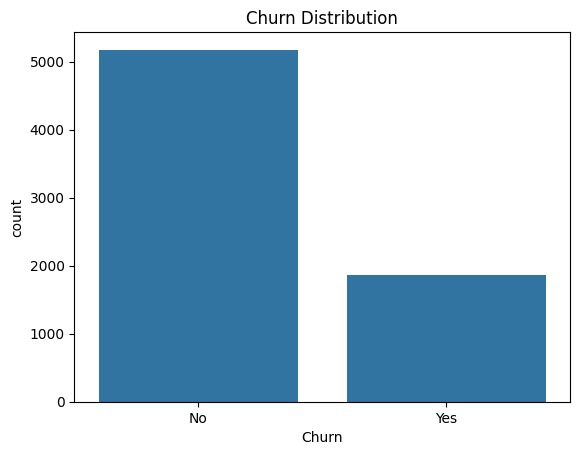

In [10]:
# Univariate Analysis: Target Variable Distribution (Churn)

# Objective:
# Visualize the proportion of churned vs retained customers.
# Class imbalance can bias models toward the majority class.

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

### Interpretation: Churn Distribution

The target variable shows a moderate class imbalance:

- Approximately **73%** of customers did not churn.
- Approximately **27%** of customers churned.

While the imbalance is not extreme, it is significant enough to influence model evaluation. A naive model predicting all customers as “No churn” would already achieve ~73% accuracy, which could be misleading.

This indicates that evaluation metrics such as:

- Precision  
- Recall  
- F1-score  
- ROC-AUC  

will be more informative than accuracy alone.

From a business perspective, correctly identifying churners (the minority class) is more valuable than optimizing overall accuracy, since churners represent potential revenue loss.


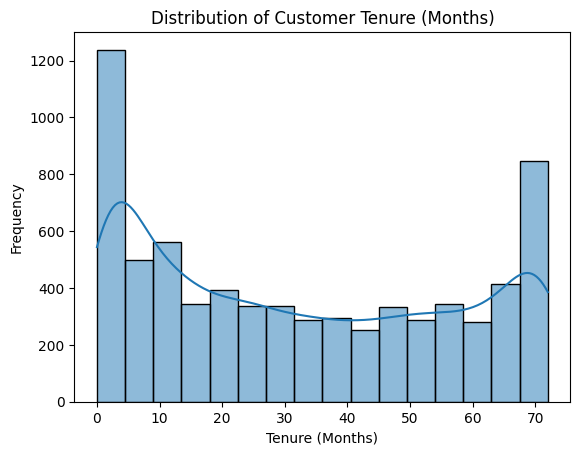

In [11]:
# Univariate Analysis: Tenure Distribution

# Objective:
# Examine how long customers typically stay with the company.
# Tenure reflects customer lifecycle maturity and may indicate retention stability.

sns.histplot(df['tenure'], kde=True)
plt.title("Distribution of Customer Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()


### Interpretation: Tenure Distribution

The distribution of customer tenure shows a high concentration of customers in the early months (0–5 months), as well as a noticeable number of long-term customers near the upper tenure range.

This indicates that the customer base consists of both newly acquired customers and established long-term subscribers.

The distribution appears slightly bimodal, suggesting two dominant tenure clusters:
- Early-stage customers
- Mature, long-tenure customers

At this stage, this analysis is purely descriptive.  
Further bivariate analysis will determine whether tenure length is associated with churn behavior.


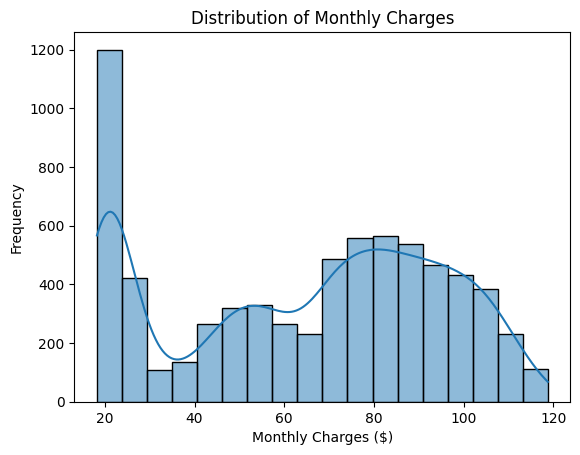

In [12]:
# Univariate Analysis: Monthly Charges Distribution

# Objective:
# Understand how billing amounts are distributed across customers.
# This helps identify pricing tiers, clustering, or skewness.

sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency")
plt.show()

### Interpretation: Monthly Charges Distribution

The distribution of MonthlyCharges shows multiple concentration regions rather than a single normal peak.

There appears to be:
- A cluster of customers at the lower pricing range (around $20–$30).
- A broader concentration in the mid-to-higher pricing range (approximately $70–$100).

This suggests the presence of different pricing tiers or bundled service levels within the customer base.

The distribution does not appear perfectly symmetric and may indicate segmentation across service packages.

At this stage, this analysis is purely descriptive.  
Further bivariate analysis will determine whether pricing levels are associated with churn behavior.


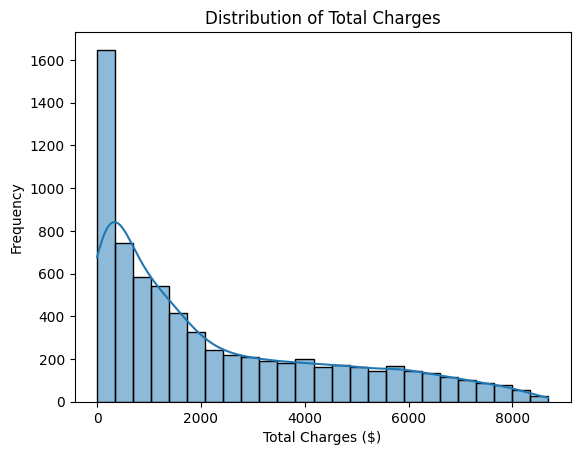

In [13]:
# Univariate Analysis: Total Charges Distribution
# Objective:
# Analyze cumulative billing amounts.
# Since TotalCharges depends on tenure, we expect right skew.

sns.histplot(df['TotalCharges'], kde=True)
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Frequency")
plt.show()

### Interpretation: Total Charges Distribution

The distribution of TotalCharges is strongly right-skewed.

Most customers have relatively low cumulative charges, while a smaller proportion of customers exhibit very high total charges.

This pattern is expected, as TotalCharges represents accumulated billing over time. Customers with longer tenure naturally accumulate higher total charges, creating a long tail toward larger values.

There are no visible extreme anomalies beyond the expected long-tail behavior.

At this stage, the distribution confirms structural dependence on tenure but does not yet indicate whether higher cumulative charges are associated with churn. This relationship will be evaluated during bivariate analysis.


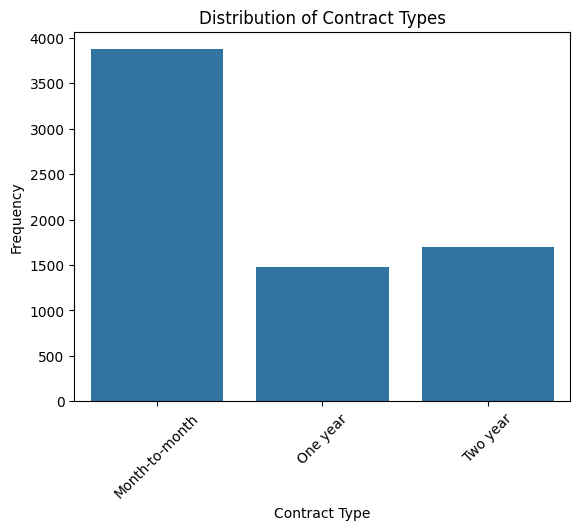

In [14]:
# Univariate Analysis: Contract Type Frequency
# Objective:
# Examine how customers are distributed across contract types.
# This helps detect class dominance and potential structural imbalance.

df['Contract'].value_counts(normalize=True)

sns.countplot(x='Contract', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.title("Distribution of Contract Types")
plt.xticks(rotation=45)
plt.show()

### Interpretation: Contract Type Distribution

The majority of customers are on **Month-to-month contracts**, significantly outnumbering those on One-year and Two-year contracts.

Key observations:

- Month-to-month contracts represent the largest segment of the customer base.
- Long-term contracts (One-year and Two-year) collectively make up a smaller portion.
- Two-year contracts slightly exceed One-year contracts in count.

Business implications (distribution only — not churn yet):

- The company relies heavily on flexible, short-term subscription agreements.
- A large portion of customers are not contractually locked in long-term.
- This may increase revenue volatility, as month-to-month customers have lower switching barriers.

At this stage, this analysis only describes contract structure composition.
The relationship between contract type and churn will be explored in the bivariate section.


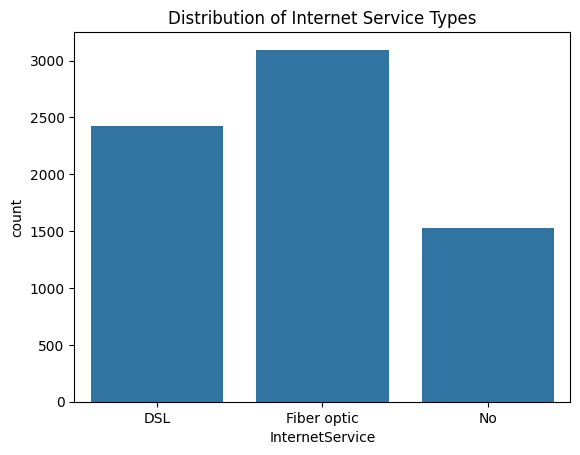

In [15]:
# Univariate Analysis: Internet Service Type Distribution
# Objective:
# Understand adoption levels of DSL, Fiber optic, or no internet service.

df['InternetService'].value_counts(normalize=True)

sns.countplot(x='InternetService', data=df)
plt.title("Distribution of Internet Service Types")
plt.show()


### Interpretation: Internet Service Type Distribution

The majority of customers subscribe to Fiber optic internet service, followed by DSL, while a smaller segment of customers have No internet service.

Key observations:

- Fiber optic represents the largest portion of the customer base.

- DSL accounts for a substantial share but trails behind Fiber optic.

- A noticeable segment of customers have No internet service, indicating that internet access is not universal among subscribers.

- No category appears extremely rare, suggesting balanced representation across service types.

Business implications (distribution only — not churn yet):

- The company appears to have strong adoption of higher-speed Fiber optic services.

- DSL remains relevant, likely serving customers in areas without Fiber availability or those opting for lower-cost plans.

- Customers without internet service may be subscribed to alternative products (e.g., phone-only plans), representing a distinct customer segment.

- Internet service type may reflect differences in pricing, customer expectations, and service experience — all of which could influence churn behavior.

At this stage, this analysis strictly describes service adoption patterns.
The relationship between InternetService and Churn will be evaluated in the bivariate analysis section.

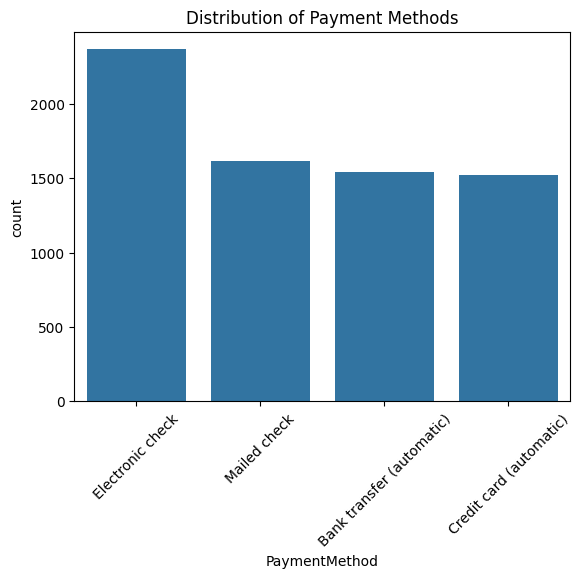

In [16]:
# Univariate Analysis: Payment Method Distribution
# Objective:
# Examine how customers pay for services.
# Useful for detecting dominant categories and potential behavioral signals.

df['PaymentMethod'].value_counts(normalize=True)

sns.countplot(x='PaymentMethod', data=df)
plt.title("Distribution of Payment Methods")
plt.xticks(rotation=45)
plt.show()


### Interpretation: Payment Method Distribution

The majority of customers use Electronic check as their primary payment method, outnumbering those who pay via Mailed check, Bank transfer (automatic), or Credit card (automatic).

Key observations:

- Electronic check represents the largest segment of the customer base.

- Automatic payment methods (Bank transfer and Credit card) collectively account for a substantial share, though individually trail Electronic check.

- Mailed check usage is comparable to automatic methods but does not dominate.

- No payment category appears extremely rare, indicating balanced representation across methods.

Business implications (distribution only — not churn yet):

- A significant portion of customers are not enrolled in automatic billing, suggesting reliance on more flexible or manual payment options.

- Customers using automatic payment methods may exhibit stronger commitment due to reduced payment friction.

- The dominance of Electronic check may signal behavioral or demographic patterns within the customer base.

- Payment method may contain predictive signal and will be evaluated further in the bivariate analysis section.

At this stage, this analysis strictly describes payment behavior composition.
The relationship between PaymentMethod and Churn will be explored in the next phase.

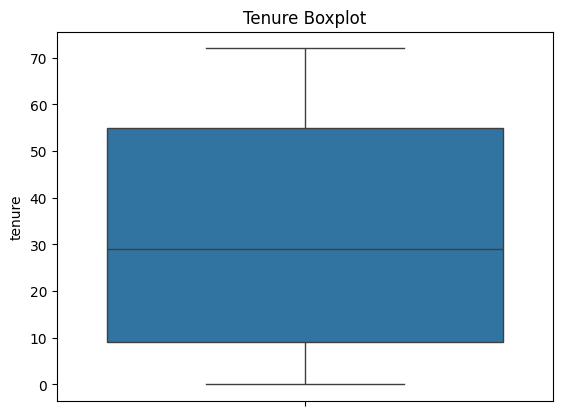

In [17]:
# Outlier Check: Tenure
sns.boxplot(y=df['tenure'])
plt.title("Tenure Boxplot")
plt.show()


### Tenure

Key observations:

- The distribution spans from 0 to approximately 72 months.

- The median tenure appears around the mid-range (~29–30 months).

- The interquartile range (IQR) is wide, indicating substantial variability in customer longevity.

- No extreme outliers are visibly separated beyond the whiskers.

Interpretation:

- The absence of extreme outliers suggests tenure values are naturally bounded and well-distributed.

- The wide spread reflects a mix of newly acquired and long-term customers.

- No immediate outlier treatment (e.g., capping or removal) appears necessary.

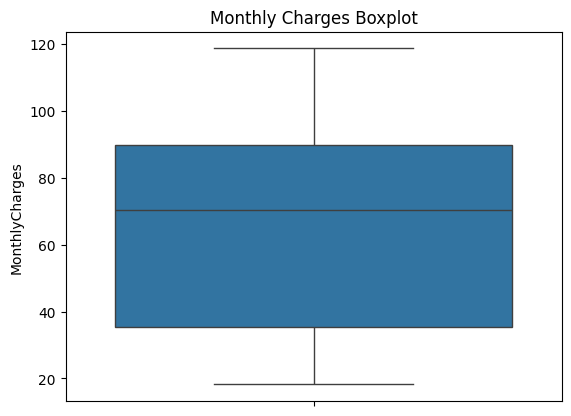

In [18]:
# Outlier Check: Monthly Charges
sns.boxplot(y=df['MonthlyCharges'])
plt.title("Monthly Charges Boxplot")
plt.show()

### MonthlyCharges

Key observations:

- Monthly charges range roughly from $18 to $120.

- The median lies around the mid-tier pricing range (~$70).

- The spread is moderate, with no isolated extreme points beyond whiskers.

Interpretation:

- MonthlyCharges does not exhibit extreme anomalies.

- The variability likely reflects different service bundles or pricing tiers.

- Since values are within realistic business bounds, no aggressive outlier handling is required.

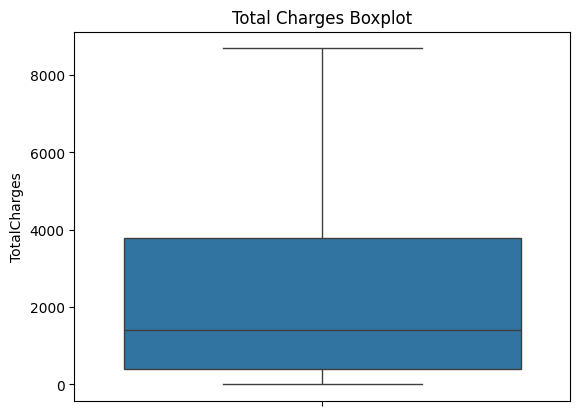

In [19]:
# Outlier Check: Total Charges
sns.boxplot(y=df['TotalCharges'])
plt.title("Total Charges Boxplot")
plt.show()

### TotalCharges

Key observations:

- TotalCharges spans from near $0 to above $8,000.

- The distribution shows a right-skewed pattern, as expected for cumulative billing.

- Higher values align with longer tenure customers.

- No abnormal extreme outliers appear detached from the distribution.

Interpretation:

- The right skew is logically consistent with cumulative billing over time.

- Large TotalCharges values are not anomalies but reflect long-term customers.

- Outlier removal is not appropriate here, as high values carry meaningful business signal.

## Bivariate Analysis: Understanding Key Drivers of Churn

In this section, we examine the relationship between the target variable (`Churn`) and selected customer features to identify patterns that differentiate churners from retained customers.

The objective is to:
- Detect segments with elevated churn risk.
- Quantify how churn rates vary across categorical and numerical variables.
- Generate business hypotheses for customer retention strategies.
- Inform feature selection and modeling decisions in later stages.

While this analysis does not establish causality, it highlights statistically meaningful associations that may contribute to churn risk.


**The following visualizations compare churn behavior across pricing, contract structure, service type, and customer tenure to identify potential structural drivers of churn.**

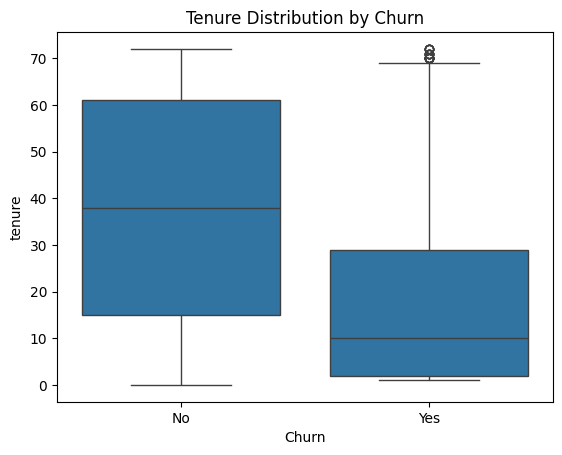

In [20]:
# Tenure vs Churn (Boxplot)

# Objective:
# Analyze how customer tenure (length of relationship in months)
# differs between churners and retained customers.

# Why this matters:
# Tenure often reflects customer lifecycle maturity.
# Early-stage customers may churn due to onboarding friction,
# unmet expectations, or lack of engagement.


sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure Distribution by Churn")
plt.show()

### Interpretation: Tenure vs Churn

**What we observe:**
- Customers who churn tend to have significantly lower tenure.
- Retained customers show a much wider and higher tenure distribution.
- The median tenure for churners is substantially lower than for non-churners.

**Business Implication:**
Churn is concentrated among early-stage customers. This suggests that the first few months of the customer lifecycle are critical.

**Potential Actions:**
- Strengthen onboarding experience.
- Implement early engagement campaigns within the first 90 days.
- Trigger proactive retention outreach for low-tenure customers.

**Modeling Insight:**
Tenure is likely a strong predictive feature and should be retained for modeling.


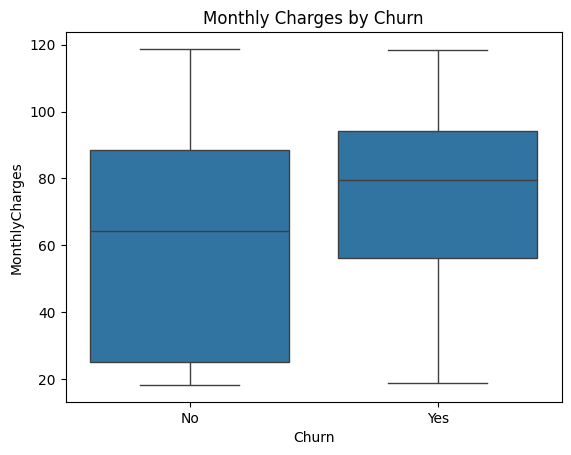

In [21]:
# Monthly Charges vs Churn (Boxplot)

# Objective:
# Examine whether pricing level (monthly bill amount)
# differs between churners and retained customers.

# Why this matters:
# Pricing sensitivity or perceived value gaps may drive churn behavior.

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

### Interpretation: Monthly Charges vs Churn

**What we observe:**
- Customers who churn tend to have higher median monthly charges.
- The distribution for churners is shifted upward relative to retained customers.

**Business Implication:**
Higher-priced plans may increase churn risk, potentially due to:
- Price sensitivity
- Perceived lack of value
- Service dissatisfaction relative to cost

**Potential Actions:**
- Evaluate pricing structure for high-cost plans.
- Offer targeted discounts or loyalty incentives for high-bill customers.
- Improve perceived value communication for premium tiers.

**Modeling Insight:**
MonthlyCharges appears to have predictive power and should be included in the model.


In [22]:
# Contract Type vs Churn (Crosstab)

# Objective:
# Quantify churn rates across different contract types.

# normalize='index' ensures we calculate churn rate
# within each contract category.

pd.crosstab(df['Contract'], df['Churn'], normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


### Interpretation: Contract Type vs Churn (Churn Rates)

**What we observe:**
- Month-to-month contracts show the highest churn rate.
- One-year contracts significantly reduce churn.
- Two-year contracts have the lowest churn rate.

**Business Implication:**
Longer-term contracts strongly correlate with customer retention.

**Potential Actions:**
- Incentivize upgrades from month-to-month to annual contracts.
- Offer discounts or loyalty bonuses for longer commitments.
- Prioritize retention campaigns for month-to-month customers.

**Modeling Insight:**
Contract type is likely one of the strongest predictors of churn.


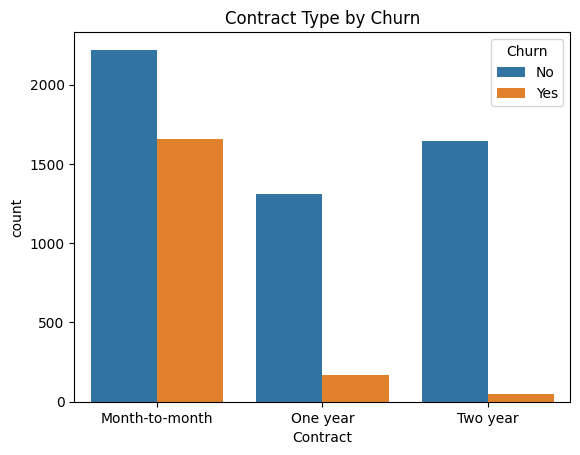

In [23]:
# Contract Type vs Churn (Customer Volume)

# This visualization shows the absolute number of churners
# within each contract category.
# Volume matters because a high-risk segment with large population
# can drive the majority of churn losses.

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type by Churn')
plt.show()

In [24]:
# Internet Service vs Churn (Churn Rates)

# Analyze churn rate across DSL, Fiber optic, and No Internet groups.


pd.crosstab(df['InternetService'], df['Churn'], normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


### Interpretation: Internet Service vs Churn (Churn Rates)

**What we observe:**
- Fiber optic customers exhibit the highest churn rate.
- DSL customers have moderate churn.
- Customers without internet service show the lowest churn.

**Business Implication:**
Fiber optic customers may experience dissatisfaction, higher expectations, or price sensitivity.

**Potential Actions:**
- Investigate service reliability for fiber optic customers.
- Analyze support ticket patterns.
- Evaluate pricing competitiveness for fiber plans.

**Modeling Insight:**
InternetService type appears strongly associated with churn and should be included in modeling.


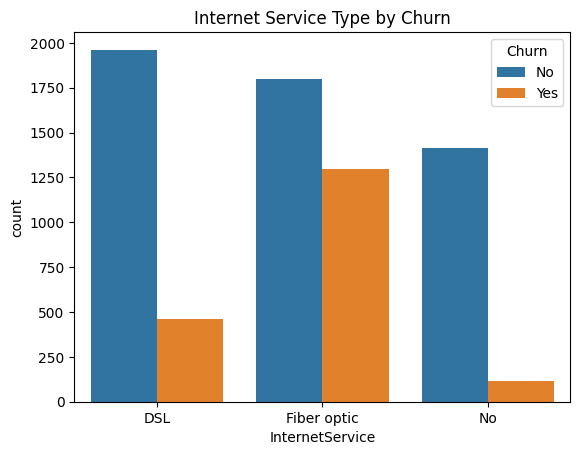

In [25]:
# Internet Service vs Churn (Customer Volume)

# This visualization shows churn volume across service types.

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service Type by Churn')
plt.show()

### Correlation Analysis (Numerical Features)

A correlation matrix is generated to examine the linear relationships between key numerical variables: tenure, MonthlyCharges, TotalCharges, and SeniorCitizen.

The purpose of this analysis is to:

- Identify potential multicollinearity between predictors.
- Detect redundant features that may carry similar information.
- Validate expected structural relationships within the dataset.
- Ensure no suspiciously strong relationships exist that could indicate data leakage.

Correlation values range from -1 to +1:

- +1 indicates a perfect positive linear relationship.
- 0 indicates no linear relationship.
- -1 indicates a perfect negative linear relationship.

Particular attention is given to the relationship between tenure and TotalCharges, as TotalCharges is cumulative and may strongly correlate with tenure. High correlation between independent variables can introduce multicollinearity, which may affect linear models such as Logistic Regression by producing unstable or inflated coefficients.

Tree-based models are generally less sensitive to multicollinearity; however, it is important to assess this early in the modeling process.


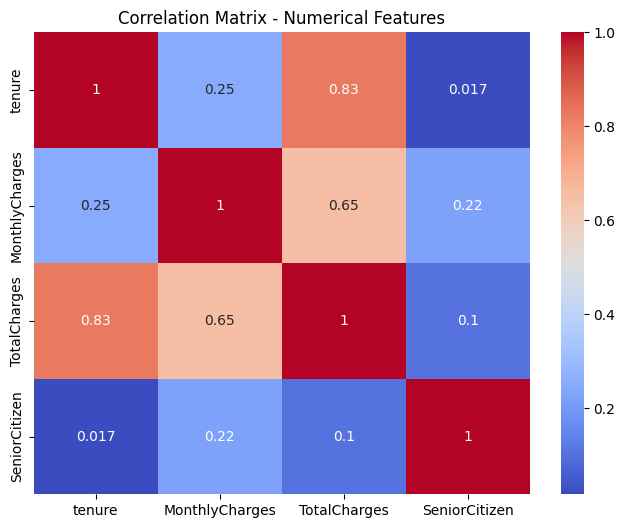

In [26]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Numerical Features")
plt.show()

### Interpretation: Correlation Matrix (Numerical Features)

The correlation heatmap reveals the linear relationships between tenure, MonthlyCharges, TotalCharges, and SeniorCitizen.

Key observations:

- TotalCharges and tenure show a strong positive correlation (0.83). This is expected, as TotalCharges accumulates over time and is therefore structurally linked to tenure.
- TotalCharges and MonthlyCharges exhibit a moderate positive correlation (0.65), indicating that customers with higher monthly costs tend to accumulate higher total charges.
- tenure and MonthlyCharges display a weak-to-moderate correlation (0.25), suggesting only a mild association between customer longevity and pricing tier.
- SeniorCitizen shows weak correlations with the other numerical features, indicating no strong linear relationship with tenure or billing variables.

Implications:

- The strong correlation between tenure and TotalCharges suggests potential multicollinearity concerns for linear models such as Logistic Regression.
- While the correlation is not extreme (>0.90), it is high enough to warrant awareness during model development.
- Tree-based models (e.g., Random Forest, Gradient Boosting) are generally less sensitive to multicollinearity.
- No unexpected or suspicious correlations were detected, indicating no immediate signs of data leakage.

Overall, the observed relationships are structurally consistent with business logic.


In [27]:
# Multicollinearity Check using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Select only numeric predictors you plan to use
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Add constant term
X = sm.add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_data


,Feature,VIF
0,const,14.899868
1,tenure,5.836728
2,MonthlyCharges,3.216730
3,TotalCharges,9.510931


## Multicollinearity Check (VIF Interpretation)

To formally assess multicollinearity among numerical predictors, the Variance Inflation Factor (VIF) was calculated for `tenure`, `MonthlyCharges`, and `TotalCharges`.

### VIF Results

| Feature          | VIF      |
|------------------|----------|
| tenure           | 5.84     |
| MonthlyCharges   | 3.22     |
| TotalCharges     | 9.51     |

(*Note: The VIF for the constant term is ignored.*)

### Interpretation

- **TotalCharges (VIF ≈ 9.51)** shows high multicollinearity.  
- **tenure (VIF ≈ 5.84)** indicates moderate multicollinearity.  
- **MonthlyCharges (VIF ≈ 3.22)** is within an acceptable range.

The elevated VIF values for `TotalCharges` and `tenure` are expected from business logic, as:

> `TotalCharges ≈ tenure × MonthlyCharges`

This structural relationship naturally introduces redundancy between these variables.

### Implications for Modeling

- Logistic Regression (a linear model) is sensitive to multicollinearity.  
- High multicollinearity can:
  - Inflate coefficient variance
  - Reduce interpretability
  - Cause unstable coefficient estimates

Given that `TotalCharges` is derived from `tenure` and `MonthlyCharges`, it may introduce redundant information into linear models.

For improved model stability and interpretability, one of the highly collinear variables (likely `TotalCharges`) may be removed when training linear models.

Tree-based models (e.g., Random Forest, Gradient Boosting) are generally less affected by multicollinearity.

### Conclusion

The multicollinearity observed is structurally explainable and aligned with business logic.  
Feature selection decisions will be evaluated during the modeling phase.


### Preliminary Feature Importance (Baseline Random Forest)

A baseline Random Forest classifier is trained to obtain an initial estimate of feature importance.

The objective of this step is exploratory, not predictive. The model is not tuned, and preprocessing steps such as proper encoding and scaling will be implemented later in the modeling phase.

This analysis helps to:

- Identify features that may strongly influence churn.
- Detect potentially weak or redundant predictors.
- Gain early insight into which variables the model considers most informative.

Random Forest provides feature importance scores based on the reduction in impurity across trees. While these scores do not imply causation, they offer useful directional guidance for further modeling and feature engineering decisions.


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Basic encoding for quick test
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(['Churn', 'customerID'], axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


/var/folders/d6/pm3ct4q959d5kg98715h98980000gn/T/ipykernel_22134/725590789.py:8: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df_encoded.select_dtypes(include='object').columns:


KeyError: "['customerID'] not found in axis"

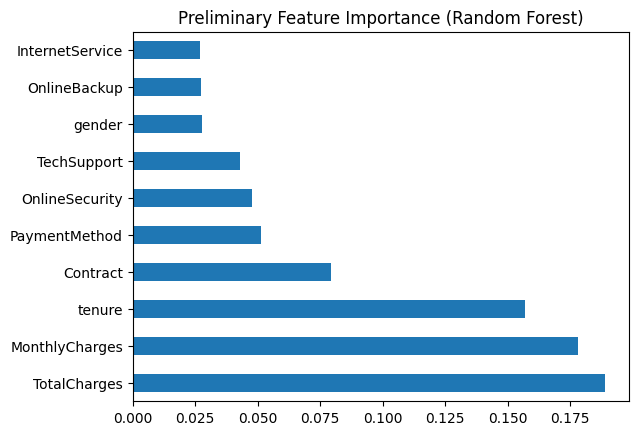

In [ ]:
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Preliminary Feature Importance (Random Forest)")
plt.show()

### Interpretation: Preliminary Feature Importance (Random Forest)

Key observations:

Primary drivers:
- TotalCharges, MonthlyCharges, and tenure are the most influential features.
- This indicates that customer longevity and financial burden play the largest role in predicting churn.

Commitment and retention factors:
- Contract type and PaymentMethod show meaningful importance, suggesting that customers with longer commitments or automatic payment mechanisms are less likely to churn.
- OnlineSecurity and TechSupport also contribute, indicating service support and perceived reliability influence retention.

Secondary factors:
- gender, OnlineBackup, and InternetService have relatively low importance and provide only marginal predictive value.

Overall insight:

The model suggests churn behavior is primarily driven by a combination of customer tenure and service cost, while commitment mechanisms and support services act as moderating retention factors. The learned relationships are consistent with expected telecom customer behavior, supporting the validity of the dataset and exploratory analysis.


In [31]:
#Save cleaned Churn Dataset to the processed folder
df.to_csv("../data/processed/churn_cleaned.csv", index=False)

## Final EDA Conclusion

This exploratory analysis identified several strong behavioral patterns associated with customer churn.

### Key Churn Signals

Customers are significantly more likely to churn when they:

* Have short tenure (new customers)
* Are on month-to-month contracts
* Pay higher monthly charges
* Use fiber-optic internet services
* Lack security/support add-ons (OnlineSecurity, TechSupport)

### Customer Stability Indicators

Customers are less likely to churn when they:

* Have a long tenure
* Are on long-term contracts (One-year or Two-year)
* Accumulate high total charges (long-term retention behavior)

### Data Characteristics Relevant for Modeling

* Moderate class imbalance (~27% churn)
* Strong correlation between tenure and TotalCharges (potential multicollinearity)
* Numerical features on different scales (scaling required)
* No leakage-type features detected
* Behavioral features appear more predictive than demographic ones

### Modeling Implications

The dataset appears suitable for supervised classification.
Future modeling should emphasize:

* Recall for churners (minority class)
* Regularization or tree-based methods to handle correlated features
* Careful preprocessing pipeline after train-test split

EDA is now complete, and the dataset is ready for preprocessing and modeling.
